<a href="https://colab.research.google.com/github/atehsaei/Machine-Learning/blob/main/Copy_of_Churn_modeling_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/df for data science/churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

ValueError: ignored

In [ ]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df=df[df.TotalCharges!=' ']

In [ ]:
df.shape

(7032, 21)

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [ ]:
C_N_T=df[df['Churn']=='No'].tenure

In [ ]:
C_Y_T=df[df['Churn']=='Yes'].tenure

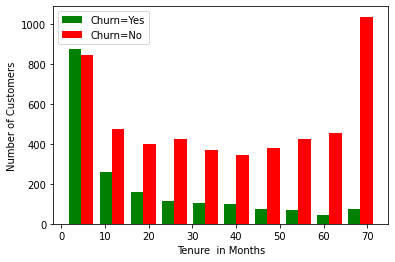

In [ ]:
plt.hist([C_Y_T,C_N_T], color=('green','red'), label=['Churn=Yes','Churn=No'])
plt.xlabel("Tenure  in Months")
plt.ylabel('Number of Customers')
plt.legend()

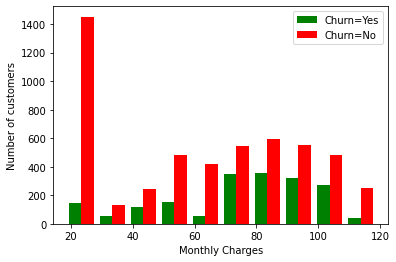

In [ ]:
C_N_T_MC=df[df['Churn']=='No'].MonthlyCharges
C_Y_T_MC=df[df['Churn']=='Yes'].MonthlyCharges
plt.hist([C_Y_T_MC,C_N_T_MC], color=('green','red'), label=['Churn=Yes','Churn=No'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.legend()


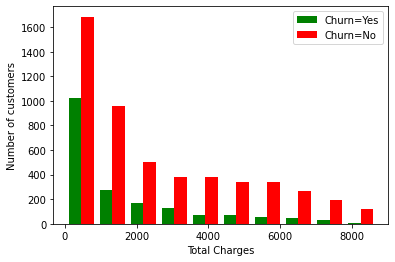

In [ ]:
C_N_T_MC=df[df['Churn']=='No'].TotalCharges
C_Y_T_MC=df[df['Churn']=='Yes'].TotalCharges
plt.hist([C_Y_T_MC,C_N_T_MC], color=('green','red'), label=['Churn=Yes','Churn=No'])
plt.xlabel('Total Charges')
plt.ylabel('Number of customers')
plt.legend()


In [ ]:
    for column in df:
        if df[column].dtype=='object':
             print(f'{column}:{df[column].unique()}')   

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [ ]:
 for column in df:
        if df[column].dtype=='object':
             print(f'{column}:{df[column].unique()}')   

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',\
      'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',\
      'PaperlessBilling','Churn']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=['OnlineBackup']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [ ]:
    for column in df:
        print(f'{column}:{df[column].unique()}')   

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [ ]:
df['gender'].replace({'Female':1,'Male':0}, inplace=True)

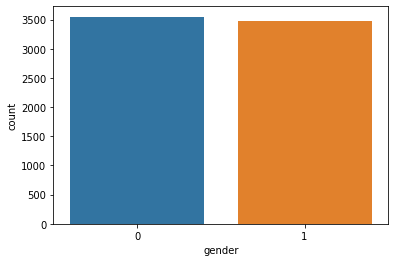

In [ ]:
sns.countplot(df['gender'])

In [ ]:
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
cols_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_scale]=scaler.fit_transform(df1[cols_scale])

In [ ]:
X=df1.drop(columns=['customerID','Churn'])
y=df1['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=5)

In [ ]:
len(x_train.columns)

26

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
model=keras.Sequential([
                        keras.layers.Dense(20, input_shape=(26,),activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid'),])
model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=60)

Epoch 1/60
176/176 [==============================] - 1s 2ms/step - loss: 0.5059 - accuracy: 0.7575
Epoch 2/60
176/176 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.7927
Epoch 3/60
176/176 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8020
Epoch 4/60
176/176 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8037
Epoch 5/60
176/176 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8092
Epoch 6/60
176/176 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8055
Epoch 7/60
176/176 [==============================] - 1s 4ms/step - loss: 0.4100 - accuracy: 0.8071
Epoch 8/60
176/176 [==============================] - 1s 3ms/step - loss: 0.4089 - accuracy: 0.8096
Epoch 9/60
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8100
Epoch 10/60
176/176 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8076

In [ ]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.7882


[0.44832131266593933, 0.7882018685340881]

In [ ]:
yp=model.predict(x_test)
yp[:5]

array([[0.37403867],
       [0.6050725 ],
       [0.01428455],
       [0.77034414],
       [0.51379734]], dtype=float32)

In [ ]:
y_pred=[]
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)
     

In [ ]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

In [ ]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
# here 👆🏻 compare y_test and y_pred with each other,%70 accuracy kind of makes sense here, errors are anticipated

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       999
           1       0.66      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



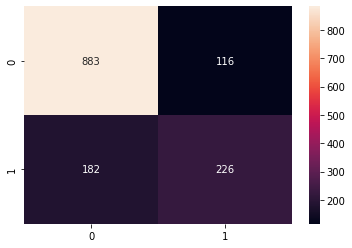

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sns.heatmap(cm, annot=True, fmt='d')